# Global Temperature Anomaly Animation Using NASA GISTEMP Data

## Changelog
| Version | Contributor | Date | Notes |
|---|---|---|---|
| 0.1 | [g-r-a-e-m-e](https://www.github.com/g-r-a-e-m-e) | 2024-01-17 | Created global animation |

## Boilerplate

In [1]:
# Imports
import xarray as xr
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display

## Load Dataset

In [2]:
# Data url
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz'

In [3]:
# Retrieve dataset from url
!wget -nc {url}

File 'gistemp1200_GHCNv4_ERSSTv5.nc.gz' already there; not retrieving.



In [4]:
# Use xarray to create dataset object
ds = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')

# Display information about the dataset
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1728, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-12-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-01-10 11:49:05 by SBBX_to_nc 2.0 - ILAND=1200,...

## Animation

In [5]:
# Define function to make the global animation
def make_animation(ds):
    # Specify plotting parameters
    fig = plt.figure(figsize = (6, 4))
    ax = fig.add_subplot(1, 1, 1, 
                         projection = ccrs.Robinson())
    
    # Create contour object
    contour = ax.pcolormesh(ds.lon,
                            ds.lat,
                            ds.tempanomaly.isel(time = 0),
                            transform = ccrs.PlateCarree(),
                            cmap = 'coolwarm',
                            norm = colors.CenteredNorm(halfrange = 3.5),
                            shading = 'gouraud')
    
    # Add features to figure
    ax.coastlines()
    ax.set_global()
    ax.set_title(f"""Global Temperature Anomaly - {ds.time[0].dt.strftime('%Y').item()}""")
    plt.colorbar(contour, 
                 location = 'bottom',
                 shrink = 0.75,
                 pad = 0.02) \
                .set_label('Temperature Anomaly: '+'$^\circ$C')
    fig.text(0.5, 
             0.025, 
             'Source: https://data.giss.nasa.gov/gistemp/',
             horizontalalignment = 'center', 
             wrap = True)
    
    # Define animate function
    def animate(n):
        ax.clear()
        ax.pcolormesh(ds.lon,
                      ds.lat,
                      ds.tempanomaly.isel(time = n),
                      transform = ccrs.PlateCarree(),
                      cmap = 'coolwarm',
                      norm = colors.CenteredNorm(halfrange = 3.5),
                      shading = 'gouraud')
        ax.coastlines()
        ax.set_global()
        ax.set_title(f"""Global Temperature Anomaly - {ds.time[n].dt.strftime('%Y').item()}""")

    # Call animation.FuncAnimation    
    ani = animation.FuncAnimation(fig = fig,
                                  func = animate,
                                  frames = len(ds.time),
                                  interval = 50)
    
    return ani

In [6]:
# Resample dataset to 3-month intervals
ds_3m = ds.resample(time = '3m').mean()

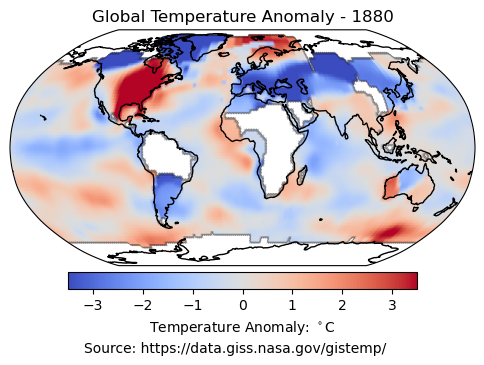

In [7]:
# Make the animation
ani_ds_3m = make_animation(ds_3m)

In [8]:
# Save the animation as a .gif
ani_ds_3m.save('global-temperature-anomaly.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
